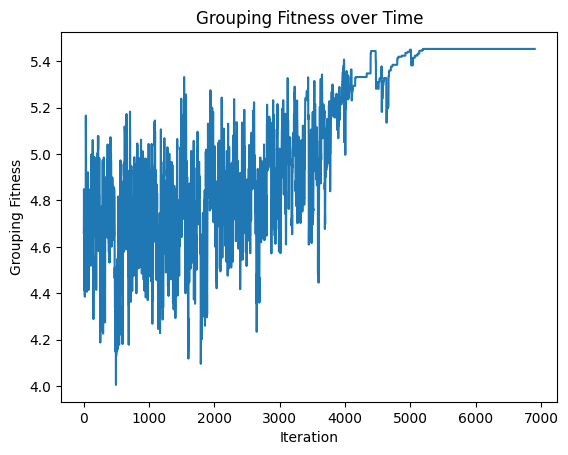

1 조 :
이름: 김주영 [-1, -1, (-0.8660254037844386, -0.5)]
이름: 진광필 [1, 1, (-0.8660254037844386, 0.5)]
이름: 양하령 [1, -1, (0.8660254037844386, -0.5)]


2 조 :
이름: 김여진 [1, 1, (0.8660254037844386, 0.5)]
이름: 신혜원 [1, 1, (-0.8660254037844386, 0.5)]
이름: 박준규 [-1, -1, (-0.8660254037844386, -0.5)]


3 조 :
이름: 최민석 [1, -1, (0.8660254037844386, -0.5)]
이름: 조미성 [1, 1, (-0.8660254037844386, -0.5)]
이름: 임소현 [-1, 1, (-0.8660254037844386, 0.5)]


4 조 :
이름: 이재호 [-1, 1, (0, -1)]
이름: 한상준 [1, -1, (-0.8660254037844386, 0.5)]
이름: 임수환 [1, -1, (0, 1)]


5 조 :
이름: 이서현 [-1, 1, (0, -1)]
이름: 정태연 [1, 1, (-0.8660254037844386, 0.5)]
이름: 백규선 [1, -1, (0, 1)]


6 조 :
이름: 양하경 [-1, 1, (0, -1)]
이름: 정민우 [1, -1, (0, 1)]
이름: 박찬혁 [1, -1, (-0.8660254037844386, -0.5)]


7 조 :
이름: 최자민 [1, 1, (0.8660254037844386, -0.5)]
이름: 한영준 [1, -1, (-0.8660254037844386, 0.5)]
이름: 고민범 [-1, -1, (-0.8660254037844386, -0.5)]


8 조 :
이름: 송상무 [-1, -1, (-0.8660254037844386, -0.5)]
이름: 권예솔 [-1, 1, (-0.8660254037844386, 0.5)]
이름: 고송아 [1, 1, (0, -1)]


9 조 :
이름: 정영우 

In [12]:
import os
import random
import math
import numpy as np
import matplotlib.pyplot as plt

def euclidean_dist(x, y):
    return math.sqrt(np.sum((x - y) ** 2))

class Team_building:
    def __init__(self):
        # 기본 조원을 3명으로 설정함
        # number는 조원의 수, person_number는 전체 학생의 수를 나타냄
        self.number = 3
        self.person_number = 0
        self.team_number=0

        # data_list는 학생 정보가 저장된 리스트, com_data_list는 범주형 변수를 숫자로 표현한 리스트
        self.data_list = []
        self.com_data_list = []
        self.random_team=[]

    
    # 메모장에 있는 데이터 읽고 리스트에 저장
    def data_input(self, data_name):
        with open(data_name, "r") as f:
            for line in f:
                row = line.strip().split("\t")
                self.data_list.append(row)
                self.person_number += 1
        self.team_number = self.person_number // self.number
        if self.person_number % self.number != 0:
            self.team_number += 1
        #print(self.person_number)
        return self.data_list
        
    def com_data(self):
        self.com_data_list = [item[:] for item in self.data_list]
        for item in self.com_data_list:
            if item[1] == 'S':
                item[1] = -1
            elif item[1] == 'N':
                item[1] = 1
                    
            if item[2] == 'F':
                item[2] = -1
            elif item[2] == 'T':
                item[2] = 1     
            # 색상을 숫자 좌표로 변환
            if item[3] == '빨':
                item[3] = (math.sqrt(3)/2, -1/2)
            elif item[3] == '주':
                item[3] = (math.sqrt(3)/2, 1/2)
            elif item[3] == '노':
                item[3] = (0, 1)
            elif item[3] == '초':
                item[3] = (-math.sqrt(3)/2, 1/2)
            elif item[3] == '파':
                item[3] = (-math.sqrt(3)/2, -1/2)
            elif item[3] == '보':
                item[3] = (0, -1)
            #print(self.com_data_list)
                
    #f1 거리 측정
    def f1_distance(self,team):
        x=0
        for i in range(len(team)):
            for j in range(i+1,len(team)):
                x += euclidean_dist(team[i][1],team[j][1])
        #x을 정규화 해야 함
        C = (len(team)*(len(team)-1))/2
        if len(team)==1:
            return x
        D = x/(2*C)
        return D

    
    #f2 거리측정
    def f2_distance(self,team):
        x = 0
        for i in range(len(team)):
            for j in range(i+1,len(team)):
                x += euclidean_dist(team[i][2], team[j][2])
        C = (len(team)*(len(team)-1))/2
        if len(team)==1:
            return x
        D = x/(2*C)
        return D

    #f3 거리측정
    def f3_distance(self, team):
        x=0
        for i in range(len(team)):
            for j in range(i+1, len(team)):
                distance = euclidean_dist(np.array(team[i][3]), np.array(team[j][3]))
                x += distance
        C = (len(team)*(len(team)-1))/2
        if len(team)==1:
            return x
        D = x/(2*C)
        return D
        
    def create_teams(self):
        random.shuffle(self.com_data_list)
        self.random_team = [self.com_data_list[i:i + self.number] for i in range(0, len(self.com_data_list), self.number)]
        return self.random_team
    
    #한 조의 다양성
    def diversity_measure(self,team):
        alpha = 3*math.sqrt(3) / (4 + 6 * math.sqrt(3))
        beta = 3*math.sqrt(3) / (4 + 6 * math.sqrt(3))
        gamma = 4 / (4 + 6 * math.sqrt(3))
        d1 = self.f1_distance(team)
        d2 = self.f2_distance(team)
        d3 = self.f3_distance(team)
        diversity = (alpha*d1) + (beta*d2) + (gamma*d3)
        #print("diversity= ",diversity)
        return diversity

    #일치성 척도
    def consistency_measure(self):
        diversity_list = []
        #self.random_team=self.create_teams()
        for i in range(self.team_number):
            diversity_list.append(self.diversity_measure(self.random_team[i]))
        #print("diversity_list=",diversity_list)
        div_max=max(diversity_list)
        div_min=min(diversity_list)
        consistency=div_max-div_min
        return consistency

    #그룹핑 적합도
    def grouping_fitness(self,team):
        alpha=4
        beta=1
        div_sum=0
        #print(self.random_team)
        for i in range(self.team_number):
            #print(i)
            div_sum+=(self.diversity_measure(team[i]))
            #print(div_sum)
        #print("div_sum/N=",div_sum/self.team_number)
        #print("consistency=",1/self.consistency_measure())
        grouping_fitness= alpha*(div_sum/self.team_number)+beta*(1/self.consistency_measure())
        return grouping_fitness

        #이웃 함수
    def get_neighbor(self, current_state):
        neighbor = [item[:] for item in current_state]
        # 무작위로 첫 번째 팀 인덱스 선택
        idx1 = random.randint(0, len(neighbor)-1)
        # 무작위로 두 번째 팀 인덱스 선택 (첫 번째 인덱스와 다르도록)
        idx2 = random.randint(0, len(neighbor)-1)
        while idx2 == idx1:
            idx2 = random.randint(0, len(neighbor)-1)
        # 무작위로 첫 번째 팀 내의 멤버 인덱스 선택
        member_idx1 = random.randint(0, len(neighbor[idx1])-1)
        # 무작위로 두 번째 팀 내의 멤버 인덱스 선택
        member_idx2 = random.randint(0, len(neighbor[idx2])-1)
        # 두 멤버 스위치
        neighbor[idx1][member_idx1], neighbor[idx2][member_idx2] = neighbor[idx2][member_idx2], neighbor[idx1][member_idx1]
        return neighbor

    #simulated annealing 코드 
    def simulated_annealing(self):
        initial_temp = 100
        final_temp = 0.1
        alpha = 0.02

        initial_state = self.create_teams()
        current_temp = initial_temp
        #print(initial_state)
        current_state = initial_state
        solution = current_state
        
        fitness_history = []

        while current_temp > final_temp:
            neighbor = self.get_neighbor(current_state)  # Use your own neighbor generation function
            #print(current_state)
            #print(neighbor)
            cost_diff = self.grouping_fitness(neighbor) - self.grouping_fitness(current_state)
            #print(cost_diff)

            if cost_diff > 0:
                current_state = neighbor
                solution = neighbor
                
            else:
                if random.uniform(0, 1) < math.exp(-5 / current_temp):
                    current_state = neighbor
                    solution=neighbor
                    
            current_temp *= 0.999
            #print(self.grouping_fitness(solution))
            fitness_history.append(self.grouping_fitness(solution))


        plt.plot(fitness_history)
        plt.title('Grouping Fitness over Time')
        plt.xlabel('Iteration')
        plt.ylabel('Grouping Fitness')
        #plt.ylim(4, 7)  # y-axis limits
        plt.show()
        return solution



myteam=Team_building()
myteam.data_input("PersonalFeature.txt")
myteam.com_data()
result = myteam.simulated_annealing() #최종 조 리스트
for i in range(myteam.team_number):
    print(i+1,"조 :")
    for j in range(len(result[i])):
        print("이름:", result[i][j][0],result[i][j][1:])
    print("\n")